# Tugas Data Analysis dari hasil Data Collecting Assignment

## by Hendri Priyambowo 

library yang digunakan pada projek

In [1]:
import pandas as pd

topik yang saya kerjakan untuk tugas kali ini adalah online auction dataset
dataset merupakan data lelang online yang dilakukan pada ebay
dataset merupakan data lelang item 
- Cartier wristwatches
- Palm Pilot M515 PDAs
- Xbox game consoles
- Swarowski beads

attribut yang terdapat dalam dataset adalah sebagai berikut:
- auctionid: unique identifier of an auction
- bid: the proxy bid placed by a bidder
- bidtime: the time in days that the bid was placed, from the start of the auction
- bidder: eBay username of the bidder
- bidderrate: eBay feedback rating of the bidder
- openbid: the opening bid set by the seller
- price: the closing price that the item sold for (equivalent to the second highest bid + an increment)
- item: auction item
- auction_type


dataset asli dapat ditemukan pada tautan berikut
[here](http://www.modelingonlineauctions.com/datasets)

In [4]:
# path='https://raw.githubusercontent.com/pelajarbodoh/LatihanOnlineRetail/master/auction.csv'


df = pd.read_csv(r'E:\Fresh Graduate Academy\code\dataset\auction.csv')
df.head(10)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction
5,1639453840,1.00,0.355856,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction
6,1639453840,1.25,0.484757,sbord,1.0,1.0,355.0,Cartier wristwatch,3 day auction
7,1639453840,1.50,0.492639,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction
8,1639453840,25.00,0.494630,sbord,1.0,1.0,355.0,Cartier wristwatch,3 day auction
9,1639453840,2.00,0.511169,bfalconb,2.0,1.0,355.0,Cartier wristwatch,3 day auction


## 1. Analyzing Individual Feature Patterns using Visualization

untuk melakukan visualisasi fitur maka dibutuhkan library matplotlib dan seaborn dari python package

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

untuk mengetahui teknik visualisasi yang tepat terlebih dahulu diperlukan pemahaman terkait dengan tipe data dari masing masing attribute atau fitur dalam dataset

In [7]:
df.dtypes

auctionid         int64
bid             float64
bidtime         float64
bidder           object
bidderrate      float64
openbid         float64
price           float64
item             object
auction_type     object
dtype: object

kemudian untuk attribute yang memiliki tipe data float atau integer kita dapat melakukan perhitungan korelasi dengan menggunakan method corr()

In [9]:
df.corr()

,auctionid,bid,bidtime,bidderrate,openbid,price
auctionid,1.000000,-0.321241,0.105107,-0.006708,-0.147995,-0.379600
bid,-0.321241,1.000000,0.132494,-0.016641,0.609979,0.858311
bidtime,0.105107,0.132494,1.000000,-0.031590,0.054780,-0.090308
bidderrate,-0.006708,-0.016641,-0.031590,1.000000,-0.001964,-0.015810
openbid,-0.147995,0.609979,0.054780,-0.001964,1.000000,0.495343
price,-0.379600,0.858311,-0.090308,-0.015810,0.495343,1.000000


kemudian kita juga dapat melakukan perhitungan korelasi antar beberapa attribute data

In [11]:
df[['bid', 'bidderrate', 'price']].corr()

,bid,bidderrate,price
bid,1.000000,-0.016641,0.858311
bidderrate,-0.016641,1.000000,-0.015810
price,0.858311,-0.015810,1.000000


### Continuous numerical variables

variabel kontinyu merupakan variabel yang memiliki value di dalam suatu range. tipe data variabel kontinyu dapat berupa integer atau float

cara terbaik untuk melakukan visualisasi untuk tipe data seperti ini adalah dengan menggunakan scatterplots dengan melakukan fit data berdasarkan garis

**Positive linear relationship**

berikut merupakan contoh pemetaan variabel "bid" dengan variabel "price"

(0, 7139.180312123824)

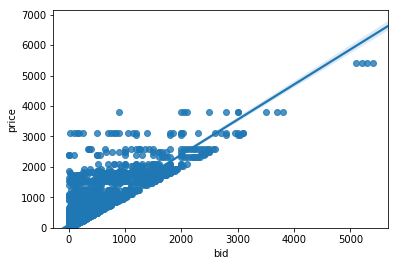

In [13]:
# Engine size as potential predictor variable of price
sns.regplot(x="bid", y="price", data=df)
plt.ylim(0,)

dengan meningkatnya bid atau nilai tawaran barang, nilai harga barang juga meningkat

variabel bid dapat digunakan sebagai variabel predictor yang baik untuk variabel price dikarenakan garis regresi yang terbentuk hampir membentuk garis diagonal yang sempurna

kemudian kira juga dapat melakukan perhitungan correlasi antara "bid" dengan "price"

In [14]:
df[["bid", "price"]].corr()

,bid,price
bid,1.000000,0.858311
price,0.858311,1.000000


berdasarkan sistem kita memperoleh nilai sekitar **0.85**

(0, 8017.181501853655)

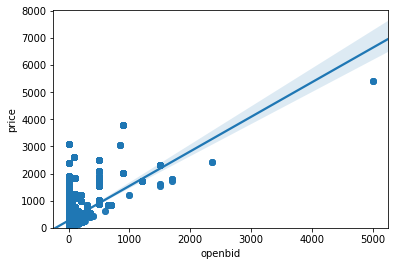

In [16]:
# Engine size as potential predictor variable of price
sns.regplot(x="openbid", y="price", data=df)
plt.ylim(0,)

In [17]:
df[["openbid", "price"]].corr()

,openbid,price
openbid,1.000000,0.495343
price,0.495343,1.000000


variabel openbid juga dapat digunakan untuk menjadi predictor bagi variabel harga akan tetapi nilai correlasi nya tidak sebaik dengan variabel bid

**Negative linear relationship**

selain itu kita juga dapat mencoba untuk menemukan variable yang membuat plot negatif atau jadi negative predictor bagi variable price


(0, 5669.619654780368)

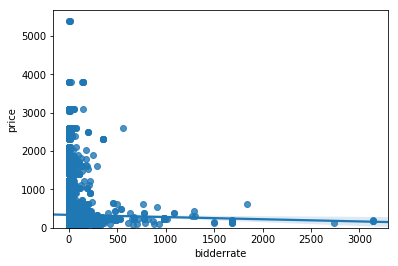

In [18]:
# Engine size as potential predictor variable of price
sns.regplot(x="bidderrate", y="price", data=df)
plt.ylim(0,)

In [21]:
df[["bidderrate", "price"]].corr()

,bidderrate,price
bidderrate,1.00000,-0.01581
price,-0.01581,1.00000


berdasarkan percobaan semakin tinggi nilai bidderrate maka harga dari barang menjadi rendah. hal ini menandakan inverse atau hubungan negatif antar dua variabel

sehingga variabel bidderrate dapat digunakan sebagai predictor yang potensial bagi variabel price

berdasarkan perhitungan korelasi antara variabel bidderrate dan variabel price diperoleh nilai korelasi sebesar **-0.015**


**Weak Linear Relationship**

saya juga mencoba melakukan eksperimen untuk variabel "bidtime" dan variabel "price"

(0, 5669.25933049424)

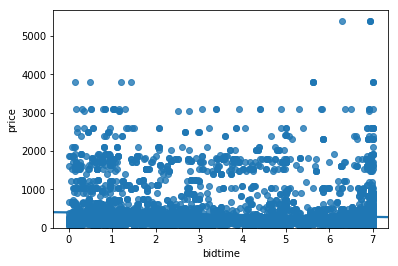

In [20]:
# Engine size as potential predictor variable of price
sns.regplot(x="bidtime", y="price", data=df)
plt.ylim(0,)

In [ ]:
# Engine size as potential predictor variable of price
sns.regplot(x="bidtime", y="price", data=df)
plt.ylim(0,)

In [22]:
df[["bidtime", "price"]].corr()

,bidtime,price
bidtime,1.000000,-0.090308
price,-0.090308,1.000000


variabel bidtime sepertinya bukan predictor yang baik untuk variabel price dikarenakan kurva regresi yang terbentuk hampir horizontal
selain itu data hasil plot juga beragam ada banyak yang jauh dari garis plot, sehingga variabel ini merupakan variabel yang tidak reliabel

berdasarkan percobaan perhitungan korelasi antara variabel "bidtime" dengan "price" diperoleh hasil sebesar -0.101

### Categorical variabel

variabel ini dapat berperan sebagai variabel yang dapat mendeskripsikan ciri dari suatu unit dan terpilih dari kategori yang cenderung sedikit/kecil

categorical variabel dapat memiliki tipe data "object" atau "int64". teknik yang baik untuk memvisualisasi data categorical adalah dengan menggunakan boxplots

mari kita tinjau hubungan antara variabel **"item"** dengan variabel **"harga"**

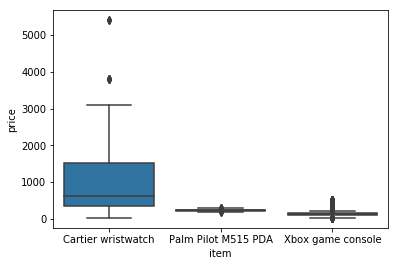

In [23]:
sns.boxplot(x="item", y="price", data=df)

dapat dilihat distribusi harga untuk setiap item yang dilelang ada sedikit overlap terutama pada item Palm Pilot dan Xbox Game console
akan tetapi karena nilai overlap nya tidak begitu besar sehingga variabel **"item"** dapat menjadi potential good predictor untuk variabel **price**

saya juga mencoba melakukan ploting antara variabel **"auction type"** serta **"price"** akan tetapi hasil plotting yang diperoleh tidak terlalu bagus

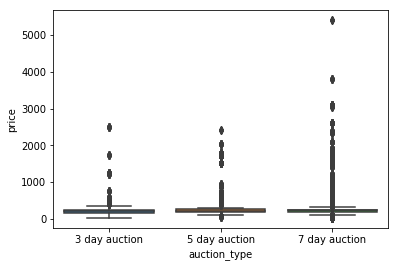

In [24]:
sns.boxplot(x="auction_type", y="price", data=df)

## 3. Descriptive Statistical Analysis

kemudian kita juga dapat mencoba untuk mendeksripsikan variabel dengan pendekatan **statistik**

yang akan coba diimplementasikan adalah
This will show:
- jumalh variabel
- mean
- standard deviation (std) 
- minimum value
- IQR (Interquartile Range: 25%, 50% and 75%)
- maximum value



kita dapat mengimpelemtasikan teknik tersebut dengan method **decribe**

In [27]:
df.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,1.068100e+04,10681.000000,10681.000000,10670.000000,10681.000000,10681.000000
mean,4.136148e+09,207.586109,3.979628,31.936739,52.246256,335.043589
std,2.489918e+09,323.037396,2.353386,120.594074,168.453245,433.566009
min,1.638844e+09,0.010000,0.000567,-4.000000,0.010000,26.000000
25%,3.015329e+09,72.000000,1.949931,1.000000,1.000000,186.510000
50%,3.020526e+09,140.000000,4.140833,5.000000,4.990000,228.490000
75%,8.212136e+09,210.000000,6.448060,21.000000,50.000000,255.000000
max,8.215611e+09,5400.000000,6.999990,3140.000000,5000.000000,5400.000000


pengaturan default dari methode describe akan melewatkan perhitugan variabel dengan tipe object.

kita dapat melakukan perhitungan method describe terhadap tipe data **"object"** dengan potongan kode berikut

In [28]:
df.describe(include=['object'])

,bidder,item,auction_type
count,10665,10681,10681
unique,3387,3,3
top,warrencheryl,Palm Pilot M515 PDA,7 day auction
freq,45,5917,7041


### Value count

method value count merupakan teknik yang dapat digunakan untuk menghitung berapa banyak **unit** yang untik dalam suatu variabel

untuk mengimpelentasikan method tersebut kita dapat menggunakan method **"value_count"** dan method tersebut hanya bekerja pada **pandas series** 


In [29]:
df['item'].value_counts()

Palm Pilot M515 PDA    5917
Xbox game console      2811
Cartier wristwatch     1953
Name: item, dtype: int64

kemudian kita dapat mengubah data tersebut kedalam dataframe dengan perintah berikut :

In [30]:
df['item'].value_counts().to_frame()

,item
Palm Pilot M515 PDA,5917
Xbox game console,2811
Cartier wristwatch,1953


kemudian lakukan cara tersebut akan tetapi kita akan menyimpan hasilnya pada dataframe baru yaitu "item_count"

In [31]:
item_count = df['item'].value_counts().to_frame()
item_count.rename(columns={'item': 'value_counts'}, inplace=True)
item_count

,value_counts
Palm Pilot M515 PDA,5917
Xbox game console,2811
Cartier wristwatch,1953


kemudian index tersebut dapat kita rename misalnya menjadi **item**

In [32]:
item_count.index.name = 'item'
item_count

,value_counts
item,
Palm Pilot M515 PDA,5917
Xbox game console,2811
Cartier wristwatch,1953


kita dapat mengulangi cara tersebut untuk variabel yang lain

## 4. Basic of Grouping

method **groupby** dapat melakukan grouping data ke kategori yang berbeda

data digrouping berdasarkan satu atau beberapa variabel dan analisa akan dilakukan terhadap group secara sendiri sendiri

contohnya kita akan coba melakukan **grouping** terhadap variabel **item**. berdasarkan kode kita dapat melihat ada 3 buah kategori yang berbeda dalam variabel **item**

In [33]:
df['item'].unique()

array(['Cartier wristwatch', 'Palm Pilot M515 PDA', 'Xbox game console'],
      dtype=object)

jika kita ingin mengetahui, secara **rata rata** jenis item apa yang paling berharga

maka kita dapat melakukan group dalam variabel **item** dan melakukan perhitungan rata rata

misalnya kita akan melakukan grouping antara variabel **item**, **auction_type** dan **price** dan di assign ke variabel **df_group_one**


In [34]:
df_group_one=df[['item','auction_type','price']]

kemudian kita dapat melakukan perhitungan rata rata harga untuk masing masing kategori data yang berbeda

In [35]:
# grouping results

df_group_one=df_group_one.groupby(['item'],as_index= False).mean()
df_group_one

,item,price
0,Cartier wristwatch,925.047906
1,Palm Pilot M515 PDA,231.130267
2,Xbox game console,143.857780


berdasarkan data yang kita miliki item **Cartier Wristwatch** secara **rata rata** adalah yang paling mahal dan item **palm pilot** serta **xbox** hampir memiliki harga yang sama

kita juga dapat melakukan grouping antar variabel yang berbeda
misalnya kita ingin melakukan grouping variabel **item** serta **auction_type** secara langsung. maka akan terbentuk dataframe group yang unik antar kombinasi item tersebut

In [36]:
# grouping results
df_gptest=df[['item','auction_type','price']]
grouped_test1=df_gptest.groupby(['item','auction_type'],as_index= False).mean()
grouped_test1

,item,auction_type,price
0,Cartier wristwatch,3 day auction,678.779800
1,Cartier wristwatch,5 day auction,960.790620
2,Cartier wristwatch,7 day auction,961.307819
3,Palm Pilot M515 PDA,3 day auction,227.452928
4,Palm Pilot M515 PDA,5 day auction,230.115270
5,Palm Pilot M515 PDA,7 day auction,232.527364
6,Xbox game console,3 day auction,122.560987
7,Xbox game console,5 day auction,149.259364
8,Xbox game console,7 day auction,149.091252


data yang telah di grouping akan lebih mudah untuk divisualisasikan apabila di transform dalam pivot table. secara sederhana pivot tabel mirip dengan excel spreadsheat

untuk percobaan ini kita akan mencoba untuk menset variabel **item** sebagai baris dan variabel **auction_type** sebagai kolom

In [37]:
grouped_pivot=grouped_test1.pivot(index='item',columns='auction_type')
grouped_pivot

price                            
auction_type        3 day auction 5 day auction 7 day auction
item                                                         
Cartier wristwatch     678.779800    960.790620    961.307819
Palm Pilot M515 PDA    227.452928    230.115270    232.527364
Xbox game console      122.560987    149.259364    149.091252

### variabels : item dan auction_type vs price

kita dapat menggunakan heat map untuk melakukan visualisasi 

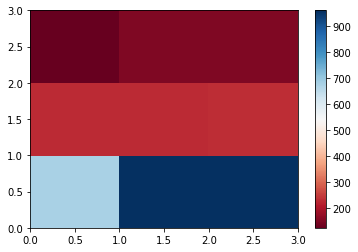

In [38]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

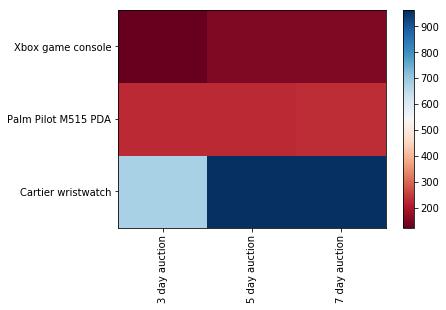

In [40]:
import numpy as np
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

visualisasi memegang peran yang penting dalam data science dan python menyediakan banyak package yang **seru** untuk diulik

pertanyaan selanjutnya adalah **apa karakteristik utama yang dapat memberikan impact tertinggi dalam menentukan harga suatu item?**

untuk mendapatkan hasil yang lebih baik dalam menentukan karakteristik terpenting, kita dapat melakukan pengecekan nilai korelasi masing masing variabel terhadap harga item



## 4. Correlation dan Causation

**Correlation** : perhitungan untuk menilai interpendensi antar variabel

**Causation** : hubungan antara sebab dan akibat antar 2 variabel

### Pearson Correlation

Pearson Correlation menghitung linear dependence antar dua variabel X dan Y. Hasil Coeficient akan berada pada rentang -1 dan 1
dimana :
* **1**: Total Positive linear correlation
* **0** : no linear correlation, artinya kedua variabel tersebut tidak berhubungan atau memberi efek satu sama lainnya
* **-1** : total negative linear correlation

**Pearson Correlation** merupakan perhitungan default dalam method **corr**. Seperti sebelumnya kita dapat menghitung nilai korelasi dari variabel yang memiliki tipe **int64** dan **float64**


In [41]:
df.corr()

,auctionid,bid,bidtime,bidderrate,openbid,price
auctionid,1.000000,-0.321241,0.105107,-0.006708,-0.147995,-0.379600
bid,-0.321241,1.000000,0.132494,-0.016641,0.609979,0.858311
bidtime,0.105107,0.132494,1.000000,-0.031590,0.054780,-0.090308
bidderrate,-0.006708,-0.016641,-0.031590,1.000000,-0.001964,-0.015810
openbid,-0.147995,0.609979,0.054780,-0.001964,1.000000,0.495343
price,-0.379600,0.858311,-0.090308,-0.015810,0.495343,1.000000


terkadang kita memerlukan untuk mengetahui signifikasi antar korelasi

**P-Value** : P-Value merupakan nilai probabilitas correlasi antara 2 variabel yang secara statistik signifikan


kita dapat mendapatkan informasi ini dengan menggunakan method **stats** dalam module **scipy**

In [42]:
from scipy import stats

### Bid vs Price

saya akan coba melakukan perhitungan  Pearson Correlation dan nilai Pvalue antata**bid** dan **price**

The Pearson Correlation Coefficient is 0.8583109044151845  with a P-value of P = 0.0


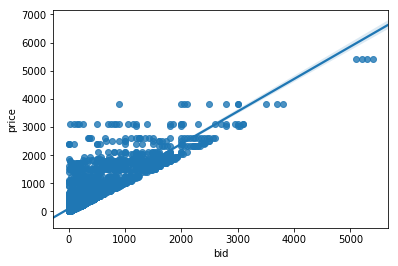

In [43]:
pearson_coef, p_value = stats.pearsonr(df['bid'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
sns.regplot(x='bid', y='price', data=df)

kesimpulan karena nilai p-value yang dikeluarkan sistem adalah **0.0** maka korelasi antara **bid** dan **price** secara statistik adalah kuat dan nilai hubungan linearnya juga relatif tinggi **0.85**

## 5. ANOVA

### ANOVA : Analysis of Variance
analsis ANOVA merupakan metode statistik untuk melakukan percobaan apakah ada perbedaan yang signifikan antar 2 atau lebih group

ANOVA mengeluarkan 2 parameter
* F-test score
* P-Value

### ITEM

mari kita lihat apakah **item** mempengaruhi **harga**

In [44]:
grouped_test2=df_gptest[['item','price']].groupby(['item'])
grouped_test2.head(2)

,item,price
0,Cartier wristwatch,177.50
1,Cartier wristwatch,177.50
1953,Palm Pilot M515 PDA,256.86
1954,Palm Pilot M515 PDA,256.86
7870,Xbox game console,117.50
7871,Xbox game console,117.50


kita dapat mendaparkan value dari method group dengan method **get_group**

In [45]:
grouped_test2.get_group('Cartier wristwatch')['price']

0        177.50
1        177.50
2        177.50
3        177.50
4        177.50
5        355.00
6        355.00
7        355.00
8        355.00
9        355.00
10       355.00
11       355.00
12       355.00
13       355.00
14       355.00
15       355.00
16       355.00
17       355.00
18       355.00
19       355.00
20       355.00
21       355.00
22       355.00
23       355.00
24       355.00
25       355.00
26       355.00
27       355.00
28       355.00
29       355.00
         ...   
1923    3050.00
1924    3050.00
1925    3050.00
1926     154.38
1927     154.38
1928     154.38
1929     154.38
1930     154.38
1931     154.38
1932     154.38
1933     154.38
1934     154.38
1935     154.38
1936     154.38
1937     154.38
1938     154.38
1939     154.38
1940     154.38
1941     154.38
1942     154.38
1943     154.38
1944     154.38
1945     380.00
1946     380.00
1947     380.00
1948     405.00
1949     405.00
1950     405.00
1951     405.00
1952     405.00
Name: price, Length: 195

kita dapat menggunakan fungsi **f_oneway** dalam module **stats** untuk mendapatkan nilai **F-test** dan **P-value**

In [46]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Cartier wristwatch')['price'], grouped_test2.get_group('Palm Pilot M515 PDA')['price'], grouped_test2.get_group('Xbox game console')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 3892.237475535568 , P = 0.0


kita dapat melakukan percobaan dengan variabel lain

untuk mendapatkan variabel yang penting sebagai fitur dapat dilakukan eksperimen dengan menggunakan teknik yang diatas pada setiap variabel yang tersedia pada data

untuk tugas kali ini saya hanya mencontohkan beberapa variabel sebagai sampling

terima kasih perhatiannya 
Salam, **Hendri Priyambowo**